In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
import os
import time
import re

In [ ]:
import pandas as pd

input_excel_file = 'news_share_data.xlsx'
output_csv_file = 'news_share_data.csv'

# Read the Excel file
df = pd.read_excel('news_share_data.xlsx')

# Save as CSV
df.to_csv('news_share_data.csv', index=False)

In [ ]:
# Load the dataset
df = pd.read_csv('news_share_data.csv')

df.head(5)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,...,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,...,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,...,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,...,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,...,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


,num_hrefs,shares
27,27,113245.333333
58,148,82000.000000
51,62,29950.000000
53,69,28800.000000
59,150,27400.000000
42,44,15450.000000
49,53,11200.000000
50,58,10500.000000
1,1,9418.650000
29,29,8000.000000


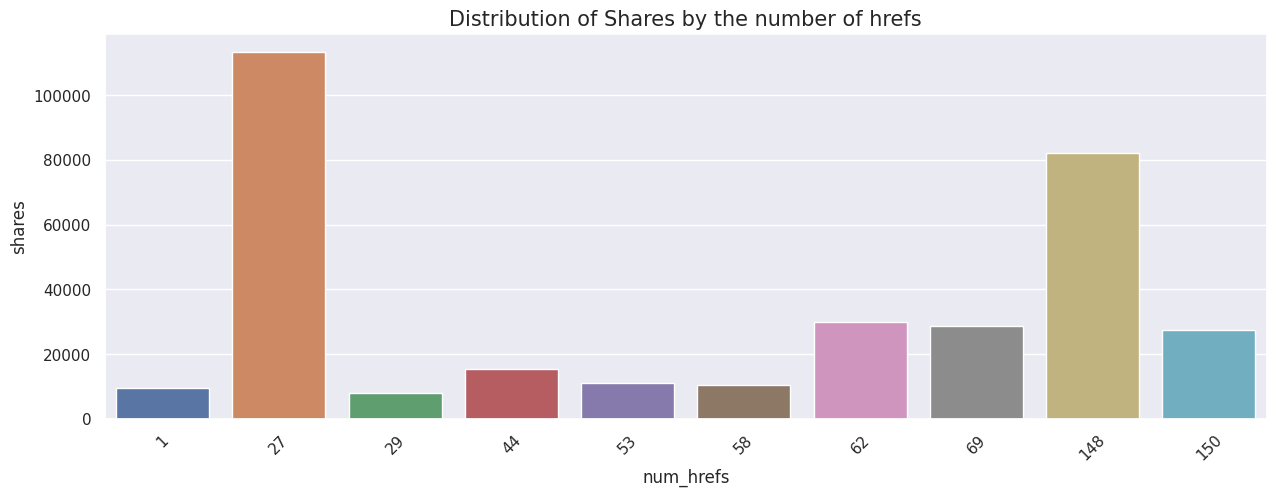

In [ ]:
temp = (df.groupby('num_hrefs')['shares'].mean()
            .reset_index().sort_values(by='shares',ascending=False)[:10])
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['num_hrefs'],y=temp['shares'])
plt.title("Distribution of Shares by the number of hrefs",size=15)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Saving the mapping dict for inference use
num_hrefs_map = df.groupby('num_hrefs')['shares'].mean().to_dict()

import pickle
fileName = 'num_hrefs_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(num_hrefs_map,f)

num_hrefs_map

{0: 2544.9523809523807,
 1: 9418.65,
 2: 6149.442307692308,
 3: 2975.655737704918,
 4: 3110.3069306930693,
 5: 3231.2948717948716,
 6: 2522.128205128205,
 7: 3156.1875,
 8: 3597.2033898305085,
 9: 3119.7966101694915,
 10: 2189.021276595745,
 11: 2454.9024390243903,
 12: 5039.771428571428,
 13: 2951.657142857143,
 14: 3118.64,
 15: 2583.206896551724,
 16: 4091.076923076923,
 17: 3757.785714285714,
 18: 4779.3125,
 19: 1389.75,
 20: 1822.6923076923076,
 21: 2186.4545454545455,
 22: 2365.4444444444443,
 23: 2640.0,
 24: 1723.142857142857,
 25: 1630.8333333333333,
 26: 6800.0,
 27: 113245.33333333333,
 28: 3564.5,
 29: 8000.0,
 30: 2821.125,
 31: 6533.333333333333,
 32: 1633.3333333333333,
 33: 4192.6,
 34: 2760.0,
 35: 4050.0,
 38: 2000.0,
 39: 1310.6666666666667,
 40: 4400.0,
 41: 847.0,
 42: 1850.0,
 43: 1450.0,
 44: 15450.0,
 45: 1921.0,
 46: 4600.0,
 47: 2246.5,
 48: 6000.0,
 49: 1200.0,
 51: 827.0,
 53: 11200.0,
 58: 10500.0,
 62: 29950.0,
 64: 4000.0,
 69: 28800.0,
 93: 3400.0,
 94:

In [ ]:
df.groupby('num_hrefs')['shares'].transform('mean')

0       3231.294872
1       3110.306931
2       3597.203390
3       3110.306931
4       2522.128205
           ...     
998     2522.128205
999     3110.306931
1000    2975.655738
1001    3156.187500
1002    3231.294872
Name: shares, Length: 1003, dtype: float64

In [ ]:
# creating the shares by hrefs feature
df['shares by hrefs'] =  df.groupby('num_hrefs')['shares'].transform('mean')
df.head(3)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,shares by hrefs
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,...,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,3231.294872
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,...,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,3110.306931
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,...,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,3597.203390


**Feature Transformation**

In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['day_of_week'] = pd.to_datetime(df['published_date'])
df['is_weekend'] = df['day_of_week'].dt.dayofweek

df[['published_date', 'day_of_week', 'is_weekend']].head()

,published_date,day_of_week,is_weekend
0,2014-03-31,2014-03-31,0
1,2014-04-01,2014-04-01,1
2,2014-04-01,2014-04-01,1
3,2014-04-01,2014-04-01,1
4,2014-04-01,2014-04-01,1


In [ ]:
df['average_token_length'] = pd.to_datetime(df['average_token_length'])
df['is_content'] = pd.to_datetime(df['average_token_length'])
df['is_title'] = df['is_content'].dt.dayofweek

df[['average_token_length', 'is_content', 'is_title']].head()

,average_token_length,is_content,is_title
0,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,3
1,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,3
2,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,3
3,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000005,3
4,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,3


In [ ]:
# Saving the mapping dict for inference use
title_map = df.groupby('title')['shares'].mean().to_dict()

import pickle
fileName = 'title_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(title_map,f)

title_map

{"'Allegiant' to Be Split Into 2 Films, Copying 'Hunger Games' Again": 993.0,
 "'Battlestar Galactica' Reboot Heading to the Big Screen: Report": 1700.0,
 "'Borderlands' Fans Go to the Moon in Upcoming 'Pre-Sequel'": 1900.0,
 "'Captain America: The Winter Soldier': 9 Key Details You May Have Missed": 20600.0,
 "'Game of Goats' Unseats Joffrey Baaa-ratheon as King": 3900.0,
 "'Game of Thrones' Opening Sequence Reimagined With Social Media": 21700.0,
 "'Game of Thrones' Premiere Crashes HBO Go": 14100.0,
 "'Game of Thrones' Recap: 9 Reasons to Be Sad King Joffrey Is Dead": 9700.0,
 "'Game of Thrones' School Pictures Will Make You Smile Awkwardly": 2600.0,
 "'Game of Thrones' Season 4 Premiere Recapped in GIFs": 4200.0,
 "'Godzilla' Extended Trailer: 13 Terrifying Views": 9600.0,
 "'Grand Budapest Hotel' Spices Up Movie Posters With Spotify Playlists": 1300.0,
 "'House of Cards' Season 3 Sneak Peek Wins April Fools' Day": 2900.0,
 "'How I Met Your Mother' Is Releasing an Alternate Ending 

In [ ]:
df.groupby('title')['shares'].transform('mean')

0       1600.0
1       1500.0
2       1400.0
3       1300.0
4       3000.0
         ...  
998     1300.0
999     1100.0
1000    4400.0
1001    1900.0
1002     949.0
Name: shares, Length: 1003, dtype: float64

In [ ]:
# creating the shares by hrefs feature
df['shares by title'] =  df.groupby('title')['shares'].transform('mean')
df.head(3)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,title_subjectivity,title_sentiment_polarity,shares,shares by hrefs,day_of_week,is_weekend,content,is_title,is_content,shares by title
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,1970-01-01 00:00:00.000000004,5,...,0.25,0.25,1600,3231.294872,2014-03-31,0,1970-01-01 00:00:00.000000004,3,1970-01-01 00:00:00.000000004,1600.0
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,1970-01-01 00:00:00.000000004,7,...,0.00,0.00,1500,3110.306931,2014-04-01,1,1970-01-01 00:00:00.000000004,3,1970-01-01 00:00:00.000000004,1500.0
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,1970-01-01 00:00:00.000000004,7,...,0.00,0.00,1400,3597.203390,2014-04-01,1,1970-01-01 00:00:00.000000004,3,1970-01-01 00:00:00.000000004,1400.0


In [ ]:
# Saving the mapping dict for inference use
published_date_map = df.groupby('published_date')['is_weekend'].mean().to_dict()

import pickle
fileName = 'published_datee_map.pkl'
with open(fileName,'wb') as f:
    pickle.dump(published_date_map,f)

published_date_map

{Timestamp('2014-03-31 00:00:00'): 0.0,
 Timestamp('2014-04-01 00:00:00'): 1.0,
 Timestamp('2014-04-02 00:00:00'): 2.0,
 Timestamp('2014-04-03 00:00:00'): 3.0,
 Timestamp('2014-04-04 00:00:00'): 4.0,
 Timestamp('2014-04-05 00:00:00'): 5.0,
 Timestamp('2014-04-06 00:00:00'): 6.0,
 Timestamp('2014-04-07 00:00:00'): 0.0,
 Timestamp('2014-04-08 00:00:00'): 1.0,
 Timestamp('2014-04-09 00:00:00'): 2.0,
 Timestamp('2014-04-10 00:00:00'): 3.0,
 Timestamp('2014-04-11 00:00:00'): 4.0,
 Timestamp('2014-04-12 00:00:00'): 5.0,
 Timestamp('2014-04-13 00:00:00'): 6.0,
 Timestamp('2014-04-14 00:00:00'): 0.0,
 Timestamp('2014-04-15 00:00:00'): 1.0,
 Timestamp('2014-04-16 00:00:00'): 2.0,
 Timestamp('2014-04-17 00:00:00'): 3.0}

In [ ]:
df.groupby('published_date')['is_weekend'].transform('mean')

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
998     3.0
999     3.0
1000    3.0
1001    3.0
1002    3.0
Name: is_weekend, Length: 1003, dtype: float64

In [ ]:
# creating the published date is weekend feature
df['published date is weekend'] =  df.groupby('published_date')['is_weekend'].transform('mean')
df.head(3)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,title_sentiment_polarity,shares,shares by hrefs,day_of_week,is_weekend,content,is_title,is_content,shares by title,published date is weekend
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,1970-01-01 00:00:00.000000004,5,...,0.25,1600,3231.294872,2014-03-31,0,1970-01-01 00:00:00.000000004,3,1970-01-01 00:00:00.000000004,1600.0,0.0
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,1970-01-01 00:00:00.000000004,7,...,0.00,1500,3110.306931,2014-04-01,1,1970-01-01 00:00:00.000000004,3,1970-01-01 00:00:00.000000004,1500.0,1.0
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,1970-01-01 00:00:00.000000004,7,...,0.00,1400,3597.203390,2014-04-01,1,1970-01-01 00:00:00.000000004,3,1970-01-01 00:00:00.000000004,1400.0,1.0
